## Kinetostatic calculation for robotic finger  (multi-rigid-body system)

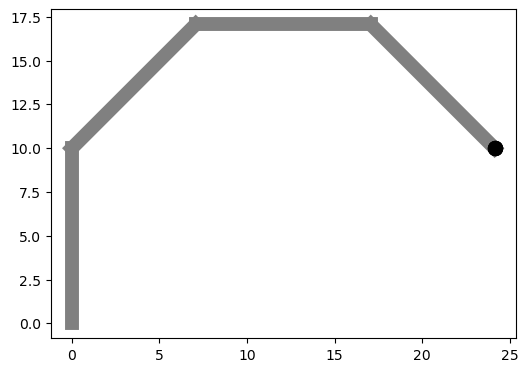

Non-zero extra value
4.686923914498237


KeyboardInterrupt: 

In [1]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

para = """
            """

def calculate():
    # Get the values from the entry widgets and convert them to integers
    values = [float(entry.get()) for entry in entry_widgets]
    
# ------------------------------------------
    # Initialize
    V = [[0 for _ in range(4)] for _ in range(6)]
    force_screw = [0] * 6
    # assign input values
    P_x = values[0] ; P_y = values[1]
    l_1 = values[2] ; l_2 = values[3] ; l_3 = values[4] ; l_4 = values[5]
    theta_1 = values[6] ; theta_2 = values[7] ; theta_3 = values[8] ; theta_4 = values[9]
    # define variables for easier matrix calculation
    l_1_sin = l_1*np.sin(theta_1)                            ; l_1_cos = l_1*np.cos(theta_1) 
    l_2_sin = l_1_sin + l_2*np.sin(theta_1+theta_2)          ; l_2_cos = l_1_cos + l_2*np.cos(theta_1+theta_2)   
    l_3_sin = l_2_sin + l_3*np.sin(theta_1+theta_2+theta_3)  ; l_3_cos = l_2_cos + l_3*np.cos(theta_1+theta_2+theta_3)
    # set velocity screw
    V[2] = [1,1,1,1]
    V[3] = [0, l_1_sin , l_2_sin , l_3_sin ]
    V[4] = [0, -l_1_cos , -l_2_cos, -l_3_cos]
    # x-operation
    X_oper = [[0 for _ in range(6)] for _ in range(6)]
    X_oper[0][3] = 1 ; X_oper[1][4] = 1 ; X_oper[2][5] = 1 ; X_oper[3][0] = 1 ; X_oper[4][1] = 1 ; X_oper[5][2] = 1
    # set up force screw
    star = P_y*(l_1*np.cos(theta_1)+l_2*np.cos(theta_1 + theta_2) + l_3*np.cos(theta_1+theta_2+theta_3)+l_4*np.cos(theta_1+theta_2+theta_3+theta_4)) - P_x*(l_1*np.sin(theta_1)+l_2*np.sin(theta_1 + theta_2) + l_3*np.sin(theta_1+theta_2+theta_3)+l_4*np.sin(theta_1+theta_2+theta_3+theta_4))
    force_screw[0] = P_x ; force_screw[1] = P_y ; force_screw[5] = star
    # calculate torques numerically
    Torques = np.dot(np.dot(-np.transpose(V), X_oper), force_screw)
    #calculate torques analytically
    analytic_sol = [0]*4
    analytic_sol[0] = - star
    analytic_sol[1] = -star-l_1_sin*P_x+l_1_cos*P_y
    analytic_sol[2] = -star-l_2_sin*P_x+l_2_cos*P_y
    analytic_sol[3] = -star-l_3_sin*P_x+l_3_cos*P_y
# -----------------------------------------
    # Display the results in separate labels
    result_label1.config(text="Force Screw: {}".format(force_screw))
    display_matrix(V)
    result_label3.config(text="Torques: {}".format(Torques))
    result_label4.config(text="Analytical Torques: {}".format(analytic_sol))

    draw_robot_arm(values[2:6], values[6:])
    printcheck = P_x*l_4*np.sin(theta_1+theta_2+theta_3+theta_4) - P_y*l_4*np.cos(theta_1+theta_2+theta_3+theta_4)
    print("Non-zero extra value")
    print(printcheck)


##############################################################################################################################

def display_matrix(matrix):
    # Clear the existing content in the text widget
    result_text.delete('1.0', tk.END)

    result_text.insert(tk.END, "Velocity Screws:\n\n")
    
    # Round the values in the matrix to 3 decimal places
    rounded_matrix = [[round(value, 3) for value in row] for row in matrix]
    
    # Display the rounded matrix in the text widget
    for row in rounded_matrix:
        result_text.insert(tk.END, " ".join(map(lambda x: "{:<8}".format(x), row)) + "\n")

##############################################################################################################################

def draw_robot_arm(length, angles):
    for i in range(10):
        clear_output(wait=True)
    # Initialize plot
    fig, ax = plt.subplots(figsize=(6, 6))
    # Define starting point
    x = 0
    y = 0
    # Draw links
    for i in range(len(length)):
        # Calculate endpoint of link
        x += length[i] * np.cos(np.deg2rad(angles[i]))
        y += length[i] * np.sin(np.deg2rad(angles[i]))
        # Plot link
        ax.plot([x - length[i] * np.cos(np.deg2rad(angles[i])), x], [y - length[i] * np.sin(np.deg2rad(angles[i])), y], linewidth=10, color='grey')
    # Draw joints
    for i in range(len(length)):
        ax.plot(x, y, 'o', markersize=10, color='black')
    # Set equal aspect ratio
    ax.set_aspect('equal', 'box')
    # Show plot
    plt.show()
##############################################################################################################################


# Names for the values
value_names = ["Px", "Py", "L1", "L2", "L3", "L4", "angle1", "angle2", "angle3", "angle4"]

# Create the main window
root = tk.Tk()
root.title("Statics and Kinematics of robotic arm")

# Create entry widgets for users to insert values, using names from value_names list
entry_widgets = []
for i, name in enumerate(value_names):
    entry_label = tk.Label(root, text=name + ": ")
    entry_label.grid(row=i, column=0, padx=5, pady=5)
    entry = tk.Entry(root)
    entry.grid(row=i, column=1, padx=5, pady=5)
    entry_widgets.append(entry)

# Create a button to trigger the calculation
calculate_button = tk.Button(root, text="Calculate", command=calculate)
calculate_button.grid(row=len(value_names), columnspan=2, padx=5, pady=10)

# Create labels to display the results
result_label1 = tk.Label(root, text="Force Screw: ")
result_label1.grid(row=len(value_names) + 1, columnspan=2, padx=5, pady=5)

# Create a text widget to display result 2 (matrix)
result_text = tk.Text(root, height=8, width=100)
result_text.grid(row=len(value_names) + 2, columnspan=2, padx=5, pady=5)
result_text.insert(tk.END, "Velocity Screws:\n\n")

result_label3 = tk.Label(root, text="Torques: ")
result_label3.grid(row=len(value_names) + 8, columnspan=2, padx=5, pady=5)

result_label4 = tk.Label(root, text="Analytical Torques: ")
result_label4.grid(row=len(value_names) + 9, columnspan=2, padx=5, pady=5)

# Start the main event loop
root.mainloop()